## Use the Chunking Experiment Class in the Analysis folder

### 1. Import the ChunkingExperiment Class

In [1]:
from notebook_utils import setup_notebook_environment, style_dataframe
setup_notebook_environment()
from app.analysis.chunking_experiment import ChunkingExperiment

import pandas as pd
import matplotlib.pyplot as plt# Other imports you might need


Added /home/sng/nanobot-poc to Python path
Notebook environment setup complete


### 2. Initialize the Experiment with Your Document

In [2]:
# Path to your document
doc_path = "/home/sng/nanobot-poc/data/original/ASRC/tool_manuals/NIKON NIS ELEMENTS D Software Manual.pdf"

# Initialize the experiment with your document
experiment = ChunkingExperiment(document_path=doc_path)

# Alternatively, if you already have a converted document:
# experiment = ChunkingExperiment(converted_doc=converted_doc)

Converting document: /home/sng/nanobot-poc/data/original/ASRC/tool_manuals/NIKON NIS ELEMENTS D Software Manual.pdf
Docling is now converting /home/sng/nanobot-poc/data/original/ASRC/tool_manuals/NIKON NIS ELEMENTS D Software Manual.pdf...
Saving docling and md...
Saved processed documents to /home/sng/nanobot-poc/data/parsed-doc/NIKON NIS ELEMENTS D Software Manual
Document conversion complete!
✅ Converted document


### 3. Run Different Chunking Strategies

In [7]:
from app.document_conversion.chunking import get_available_chunking_strategies

In [8]:
# Get available strategies
available_strategies = list(get_available_chunking_strategies().keys())
print(f"Available chunking strategies: {available_strategies}")

# Run all available strategies
results = experiment.run_all_strategies()

# Or run specific strategies
# results = experiment.run_all_strategies(["default", "balanced", "fine_grained"])

Available chunking strategies: ['default', 'balanced', 'fine_grained', 'context', 'hierarchical']


===== Testing default chunking strategy =====
Now chunking document using 'default' strategy...
Now processing chunks...
Done! Returning 341 chunks ready for preview
✅ Created DataFrame with 341 chunks

Sample chunks for default strategy:
   chunk_id                                       text_preview  text_length  \
0       213                (requires:Automatic Measurement)...           32   
1       186  Show grabbing dialog before saving Before an i...         1005   
2       324  This module extends the measurement abilities ...          259   

                              meta_filename meta_page_numbers  \
0  NIKON NIS ELEMENTS D Software Manual.pdf               108   
1  NIKON NIS ELEMENTS D Software Manual.pdf                97   
2  NIKON NIS ELEMENTS D Software Manual.pdf               173   

                    meta_title                meta_headings  \
0  7.3.5. Thresholdi

### 4. Compare Results


Strategy Comparison:
       strategy  total_chunks  avg_length  min_length  max_length
0       default           341  743.281525           2        6506
1      balanced           343  738.941691           2        5903
2  fine_grained          1551  162.636364           0        3748
3       context           341  743.281525           2        6506
4  hierarchical          1548  162.953488           0        5903


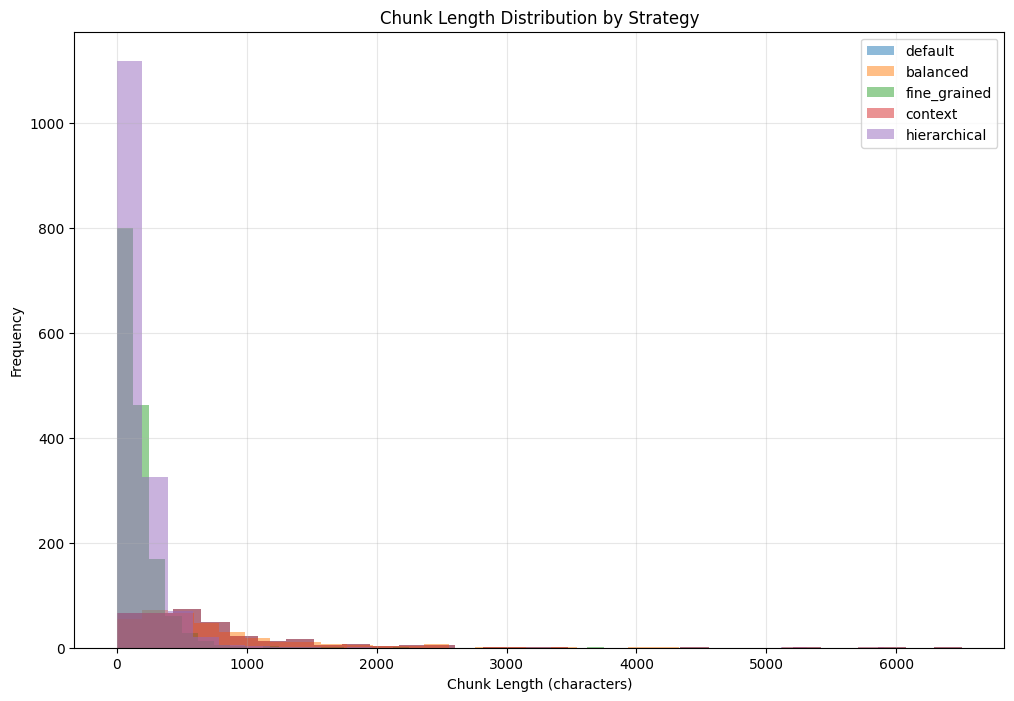

In [9]:
# Compare strategies
comparison = experiment.compare_strategies()
print("\nStrategy Comparison:")
print(comparison)

# Visualize chunk length distributions
experiment.visualize_chunk_lengths()

### 5. Save Results for Later Analysis

In [10]:
# Save results to disk
experiment.save_results(output_dir="data/chunking_results")

✅ Saved all results to data/chunking_results


### 6. Access Individual Strategy Results

In [11]:
# Access results for a specific strategy
default_results = experiment.results["default"]
default_df = default_results["df"]

# Display the DataFrame with styling
styled_df = default_df.style.set_properties(**{
    'white-space': 'pre-wrap', 
    'text-align': 'left',
    'font-size': '13px'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#f0f0f0'), ('text-align', 'center')]
}])

# Display the styled DataFrame
styled_df

### 7. Insert into Database (Optional)

In [12]:
# Insert chunks from selected strategies into the database
inserted_ids = experiment.insert_into_database(["balanced", "fine_grained"])

# Print results
for strategy, ids in inserted_ids.items():
    print(f"Inserted {len(ids)} chunks for {strategy} strategy")


Inserting chunks for 'balanced' strategy...
Adding embeddings to 343 chunks...
Uploading chunks to database...
✅ Chunk validation successful:
  • Text length: 437 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 5903 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 5297 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 589 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strategy']
✅ Chunk validation successful:
  • Text length: 3432 chars
  • Vector dimensions: 1536
  • Metadata fields: ['filename', 'title', 'page_numbers', 'headings', 'chunking_strate